In [19]:
parquet_path = "/home/recherche-a/.cache/huggingface/lerobot/Rayen023/so101_follower_put_the_red_lego_block_in_the_black_cup_eps100_fps30_20250715_123150/data/chunk-000/episode_000094.parquet"

In [20]:
import pandas as pd

df = pd.read_parquet(parquet_path)
df.head()

,action,observation.state,timestamp,frame_index,episode_index,index,task_index
0,"[-10.837989, -99.15576, 90.312355, 71.46563, -...","[-4.4897957, -98.97872, 91.545456, 75.60123, -...",0.000000,0,94,22706,0
1,"[-10.837989, -99.15576, 90.312355, 71.46563, -...","[-4.4897957, -98.97872, 91.545456, 75.60123, -...",0.033333,1,94,22707,0
2,"[-10.837989, -99.15576, 90.4029, 71.55209, -1....","[-5.1576996, -98.97872, 91.545456, 75.07652, -...",0.066667,2,94,22708,0
3,"[-10.837989, -99.15576, 90.49344, 71.55209, -1...","[-8.12616, -98.97872, 91.545456, 73.414955, -1...",0.100000,3,94,22709,0
4,"[-10.837989, -99.15576, 90.49344, 71.55209, -1...","[-9.684601, -98.97872, 91.545456, 72.89025, -0...",0.133333,4,94,22710,0


In [21]:
# Dataset Overview
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (195, 7)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   action             195 non-null    object 
 1   observation.state  195 non-null    object 
 2   timestamp          195 non-null    float32
 3   frame_index        195 non-null    int64  
 4   episode_index      195 non-null    int64  
 5   index              195 non-null    int64  
 6   task_index         195 non-null    int64  
dtypes: float32(1), int64(4), object(2)
memory usage: 10.0+ KB
None

Data Types:
action                object
observation.state     object
timestamp            float32
frame_index            int64
episode_index          int64
index                  int64
task_index             int64
dtype: object


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze array columns (action and observation.state)
print("=== ARRAY COLUMNS ANALYSIS ===")

# Action column analysis
print("\nAction Column:")
action_arrays = df['action'].values
action_lengths = [len(arr) if isinstance(arr, (list, np.ndarray)) else 0 for arr in action_arrays]
print(f"Action array lengths - Min: {min(action_lengths)}, Max: {max(action_lengths)}, Mode: {max(set(action_lengths), key=action_lengths.count)}")

# Sample action array
sample_action = action_arrays[0]
print(f"Sample action array shape: {np.array(sample_action).shape}")
print(f"Sample action values: {sample_action[:10]}...")  # First 10 values

# Observation.state column analysis
print("\nObservation.state Column:")
obs_arrays = df['observation.state'].values
obs_lengths = [len(arr) if isinstance(arr, (list, np.ndarray)) else 0 for arr in obs_arrays]
print(f"Observation state array lengths - Min: {min(obs_lengths)}, Max: {max(obs_lengths)}, Mode: {max(set(obs_lengths), key=obs_lengths.count)}")

# Sample observation array
sample_obs = obs_arrays[0]
print(f"Sample observation state array shape: {np.array(sample_obs).shape}")
print(f"Sample observation values: {sample_obs[:10]}...")  # First 10 values

=== ARRAY COLUMNS ANALYSIS ===

Action Column:
Action array lengths - Min: 6, Max: 6, Mode: 6
Sample action array shape: (6,)
Sample action values: [-10.837989  -99.15576    90.312355   71.46563    -1.2249153   0.8807046]...

Observation.state Column:
Observation state array lengths - Min: 6, Max: 6, Mode: 6
Sample observation state array shape: (6,)
Sample observation values: [ -4.4897957  -98.97872     91.545456    75.60123     -0.85470086
   1.1455525 ]...


In [23]:
# Numerical columns analysis
print("\n=== NUMERICAL COLUMNS ANALYSIS ===")

numerical_cols = ['timestamp', 'frame_index', 'episode_index', 'index', 'task_index']
print("\nNumerical columns statistics:")
print(df[numerical_cols].describe())

print("\nMissing values in numerical columns:")
print(df[numerical_cols].isnull().sum())

print("\nUnique value counts for numerical columns:")
for col in numerical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 20:  # Show unique values if less than 20
        print(f"  Unique values: {sorted(df[col].unique())}")
    print()


=== NUMERICAL COLUMNS ANALYSIS ===

Numerical columns statistics:
        timestamp  frame_index  episode_index         index  task_index
count  195.000000   195.000000          195.0    195.000000       195.0
mean     3.233333    97.000000           94.0  22803.000000         0.0
std      1.881194    56.435804            0.0     56.435804         0.0
min      0.000000     0.000000           94.0  22706.000000         0.0
25%      1.616667    48.500000           94.0  22754.500000         0.0
50%      3.233333    97.000000           94.0  22803.000000         0.0
75%      4.850000   145.500000           94.0  22851.500000         0.0
max      6.466667   194.000000           94.0  22900.000000         0.0

Missing values in numerical columns:
timestamp        0
frame_index      0
episode_index    0
index            0
task_index       0
dtype: int64

Unique value counts for numerical columns:
timestamp: 195 unique values

frame_index: 195 unique values

episode_index: 1 unique values
  

In [24]:
# Detailed analysis of action and observation arrays
print("=== DETAILED ARRAY ANALYSIS ===")

# Convert arrays to numpy for easier analysis
action_matrix = np.array([np.array(arr) for arr in df['action'].values])
obs_matrix = np.array([np.array(arr) for arr in df['observation.state'].values])

print(f"\nAction matrix shape: {action_matrix.shape}")
print(f"Observation matrix shape: {obs_matrix.shape}")

# Statistics for action values
print("\nAction array statistics (across all dimensions):")
print(f"  Min: {action_matrix.min():.6f}")
print(f"  Max: {action_matrix.max():.6f}")
print(f"  Mean: {action_matrix.mean():.6f}")
print(f"  Std: {action_matrix.std():.6f}")

# Statistics for observation values
print("\nObservation array statistics (across all dimensions):")
print(f"  Min: {obs_matrix.min():.6f}")
print(f"  Max: {obs_matrix.max():.6f}")
print(f"  Mean: {obs_matrix.mean():.6f}")
print(f"  Std: {obs_matrix.std():.6f}")

# Dimension-wise statistics for actions
print(f"\nPer-dimension statistics for actions ({action_matrix.shape[1]} dimensions):")
for i in range(min(10, action_matrix.shape[1])):  # Show first 10 dimensions
    dim_data = action_matrix[:, i]
    print(f"  Dim {i}: min={dim_data.min():.3f}, max={dim_data.max():.3f}, mean={dim_data.mean():.3f}, std={dim_data.std():.3f}")

# Dimension-wise statistics for observations
print(f"\nPer-dimension statistics for observations ({obs_matrix.shape[1]} dimensions):")
for i in range(min(10, obs_matrix.shape[1])):  # Show first 10 dimensions
    dim_data = obs_matrix[:, i]
    print(f"  Dim {i}: min={dim_data.min():.3f}, max={dim_data.max():.3f}, mean={dim_data.mean():.3f}, std={dim_data.std():.3f}")

=== DETAILED ARRAY ANALYSIS ===

Action matrix shape: (195, 6)
Observation matrix shape: (195, 6)

Action array statistics (across all dimensions):
  Min: -99.155762
  Max: 92.213669
  Mean: 8.448574
  Std: 40.331940

Observation array statistics (across all dimensions):
  Min: -99.148933
  Max: 92.454544
  Mean: 9.093369
  Std: 40.528740

Per-dimension statistics for actions (6 dimensions):
  Dim 0: min=-31.173, max=-1.453, mean=-15.060, std=11.724
  Dim 1: min=-99.156, max=21.570, mean=-31.207, std=47.047
  Dim 2: min=-27.297, max=92.214, mean=32.530, std=41.777
  Dim 3: min=45.439, max=80.199, mean=60.136, std=8.258
  Dim 4: min=-8.991, max=4.457, mean=-2.396, std=4.145
  Dim 5: min=0.480, max=28.503, mean=6.689, std=8.995

Per-dimension statistics for observations (6 dimensions):
  Dim 0: min=-31.206, max=-1.373, mean=-15.142, std=11.667
  Dim 1: min=-99.149, max=22.128, mean=-30.365, std=47.661
  Dim 2: min=-24.727, max=92.455, mean=34.108, std=41.262
  Dim 3: min=46.305, max=79.1

In [25]:
# Analysis of motor value transformation (12-bit raw values to degrees)
print("=== MOTOR VALUE TRANSFORMATION ANALYSIS ===")

print("\nYou're right! Motors typically return 12-bit values (0-4095), but your data shows degrees.")
print("Let's analyze the transformation:")

# Assuming standard servo ranges
print("\n1. Standard Servo Transformations:")
print("   - 12-bit range: 0 to 4095 (4096 possible values)")
print("   - Common servo angle ranges:")
print("     * 180° servos: 0-4095 → 0°-180°")
print("     * 270° servos: 0-4095 → 0°-270°") 
print("     * 360° servos: 0-4095 → 0°-360°")
print("     * Centered ranges: 0-4095 → -90° to +90° or -180° to +180°")

# Analyze each dimension to understand possible transformations
print(f"\n2. Analysis of each motor dimension:")
for i in range(action_matrix.shape[1]):
    action_range = action_matrix[:, i].max() - action_matrix[:, i].min()
    obs_range = obs_matrix[:, i].max() - obs_matrix[:, i].min()
    
    print(f"\n   Motor {i} (Action):")
    print(f"     Range: {action_matrix[:, i].min():.1f}° to {action_matrix[:, i].max():.1f}°")
    print(f"     Span: {action_range:.1f}°")
    print(f"     Center: {action_matrix[:, i].mean():.1f}°")
    
    # Guess the transformation based on range
    if abs(action_range - 180) < 20:
        print(f"     → Likely 180° servo (full range)")
    elif abs(action_range - 270) < 30:
        print(f"     → Likely 270° servo")
    elif abs(action_range - 360) < 40:
        print(f"     → Likely 360° servo or continuous rotation")
    elif action_range < 100:
        print(f"     → Likely limited range or centered servo")
    else:
        print(f"     → Custom range or multi-turn servo")

# Try to reverse-engineer possible raw values
print(f"\n3. Reverse-engineering possible raw 12-bit values:")
print("   If we assume common transformations:")

for i in range(action_matrix.shape[1]):
    min_deg = action_matrix[:, i].min()
    max_deg = action_matrix[:, i].max()
    range_deg = max_deg - min_deg
    
    print(f"\n   Motor {i}:")
    
    # Try different common transformations
    # 1. Linear mapping from 0-4095 to min_deg-max_deg
    if range_deg > 0:
        # What would be the raw values for min/max degrees?
        raw_min_est = 0
        raw_max_est = 4095
        scale = range_deg / 4095
        offset = min_deg
        
        print(f"     If linear 0-4095 → {min_deg:.1f}°-{max_deg:.1f}°:")
        print(f"       Scale: {scale:.6f} deg/count")
        print(f"       Offset: {offset:.1f}°")
        
        # Show some sample conversions
        sample_degrees = action_matrix[:3, i]
        estimated_raw = (sample_degrees - offset) / scale
        print(f"       Sample: {sample_degrees[0]:.1f}° → ~{estimated_raw[0]:.0f} raw")
    
    # 2. Common servo ranges
    common_ranges = [
        (0, 180, "0-180° servo"),
        (-90, 90, "±90° centered servo"),
        (0, 270, "0-270° servo"),
        (-180, 180, "±180° centered servo"),
        (0, 360, "0-360° servo")
    ]
    
    for range_min, range_max, desc in common_ranges:
        if min_deg >= range_min - 10 and max_deg <= range_max + 10:
            scale = (range_max - range_min) / 4095
            offset = range_min
            print(f"     Possible match: {desc}")
            print(f"       Transform: raw * {scale:.6f} + {offset}")

# Check if values suggest they're already processed/calibrated
print(f"\n4. Data Processing Indicators:")
print("   Your data suggests it's already been processed because:")
print("   - Values are in degrees (not raw 0-4095)")
print("   - Some values are negative (raw motors can't be negative)")
print("   - Ranges vary per motor (suggesting individual calibration)")
print("   - Values have high precision (6+ decimal places)")

print(f"\n5. Likely Processing Pipeline:")
print("   Raw 12-bit → Calibration → Degrees → LeRobot Dataset")
print("   1. Raw motor values (0-4095)")
print("   2. Apply per-motor calibration (offset, scale, limits)")
print("   3. Convert to meaningful units (degrees)")
print("   4. Store in dataset")

# Check for quantization artifacts that might reveal original resolution
print(f"\n6. Checking for quantization artifacts:")
for i in range(min(3, action_matrix.shape[1])):
    unique_vals = np.unique(action_matrix[:, i])
    if len(unique_vals) < len(action_matrix) / 2:  # If many repeated values
        print(f"   Motor {i}: {len(unique_vals)} unique values (might show quantization)")
        # Look at differences between consecutive unique values
        diffs = np.diff(np.sort(unique_vals))
        min_diff = diffs[diffs > 0].min() if len(diffs[diffs > 0]) > 0 else 0
        print(f"     Smallest step: {min_diff:.6f}° (possible resolution indicator)")
    else:
        print(f"   Motor {i}: {len(unique_vals)} unique values (smooth/interpolated)")

print(f"\n7. To find the exact transformation:")
print("   - Check the robot's configuration files")
print("   - Look for calibration parameters in LeRobot configs")
print("   - Check if there's a 'motors' or 'calibration' section in the dataset metadata")
print("   - The transformation is likely in lerobot/common/robot_devices/ or robot-specific configs")

=== MOTOR VALUE TRANSFORMATION ANALYSIS ===

You're right! Motors typically return 12-bit values (0-4095), but your data shows degrees.
Let's analyze the transformation:

1. Standard Servo Transformations:
   - 12-bit range: 0 to 4095 (4096 possible values)
   - Common servo angle ranges:
     * 180° servos: 0-4095 → 0°-180°
     * 270° servos: 0-4095 → 0°-270°
     * 360° servos: 0-4095 → 0°-360°
     * Centered ranges: 0-4095 → -90° to +90° or -180° to +180°

2. Analysis of each motor dimension:

   Motor 0 (Action):
     Range: -31.2° to -1.5°
     Span: 29.7°
     Center: -15.1°
     → Likely limited range or centered servo

   Motor 1 (Action):
     Range: -99.2° to 21.6°
     Span: 120.7°
     Center: -31.2°
     → Custom range or multi-turn servo

   Motor 2 (Action):
     Range: -27.3° to 92.2°
     Span: 119.5°
     Center: 32.5°
     → Custom range or multi-turn servo

   Motor 3 (Action):
     Range: 45.4° to 80.2°
     Span: 34.8°
     Center: 60.1°
     → Likely limited ra

In [26]:
# Let's investigate if we can find motor configuration information
print("=== INVESTIGATING MOTOR CONFIGURATION ===")

# From your dataset path, we can see it's for SO101 robot
dataset_info = {
    'robot': 'so101_follower',
    'task': 'put_the_red_lego_block_in_the_black_cup',
    'episodes': 100,
    'fps': 30,
    'date': '20250715_123150'
}

print(f"Dataset Information:")
for key, value in dataset_info.items():
    print(f"  {key}: {value}")

print(f"\nBased on the dataset path, this is an SO101 robot dataset.")
print(f"The SO101 is likely a 6-DOF robotic arm with servo motors.")

# Let's check if there are any metadata files or configs we can examine
import os
dataset_base_path = "/home/recherche-a/.cache/huggingface/lerobot/Rayen023/so101_follower_put_the_red_lego_block_in_the_black_cup_eps100_fps30_20250715_123150"

print(f"\nLet's check what's in the dataset directory:")
if os.path.exists(dataset_base_path):
    for root, dirs, files in os.walk(dataset_base_path):
        level = root.replace(dataset_base_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files[:10]:  # Show first 10 files
            print(f"{subindent}{file}")
        if len(files) > 10:
            print(f"{subindent}... and {len(files) - 10} more files")
        if level > 2:  # Don't go too deep
            break
else:
    print(f"Dataset path not found: {dataset_base_path}")

# Check for common config files
config_files_to_check = [
    'config.json',
    'dataset_info.json', 
    'metadata.json',
    'robot_config.yaml',
    'motors.yaml',
    'calibration.json'
]

print(f"\nLooking for configuration files:")
for config_file in config_files_to_check:
    config_path = os.path.join(dataset_base_path, config_file)
    if os.path.exists(config_path):
        print(f"  ✓ Found: {config_file}")
        try:
            with open(config_path, 'r') as f:
                content = f.read()[:500]  # First 500 chars
                print(f"    Preview: {content}...")
        except:
            print(f"    (Could not read file)")
    else:
        print(f"  ✗ Not found: {config_file}")

# Let's also check the main lerobot configs for SO101
lerobot_config_path = "/home/recherche-a/OneDrive_recherche_a/Linux_onedrive/Projects_linux/lerobot/lerobot/configs"
print(f"\nChecking LeRobot configs for SO101:")

if os.path.exists(lerobot_config_path):
    for item in os.listdir(lerobot_config_path):
        if 'so101' in item.lower() or 'so100' in item.lower():
            print(f"  Found config: {item}")
            item_path = os.path.join(lerobot_config_path, item)
            if os.path.isfile(item_path):
                try:
                    with open(item_path, 'r') as f:
                        content = f.read()[:1000]
                        print(f"    Content preview: {content}...")
                except:
                    print(f"    (Could not read file)")

print(f"\nCommon servo motor specifications for 6-DOF arms:")
print(f"  - Joint 1 (Base): Often 360° continuous or ±180°")
print(f"  - Joint 2 (Shoulder): Usually ±90° to ±135°")  
print(f"  - Joint 3 (Elbow): Usually ±90° to ±150°")
print(f"  - Joint 4 (Wrist Roll): Often ±180° or continuous")
print(f"  - Joint 5 (Wrist Pitch): Usually ±90°")
print(f"  - Joint 6 (Wrist Yaw/Gripper): Varies by design")

print(f"\nYour motor ranges suggest:")
for i in range(action_matrix.shape[1]):
    min_val = action_matrix[:, i].min()
    max_val = action_matrix[:, i].max()
    range_val = max_val - min_val
    center = (min_val + max_val) / 2
    
    joint_names = ["Base", "Shoulder", "Elbow", "Wrist Roll", "Wrist Pitch", "Gripper"]
    joint_name = joint_names[i] if i < len(joint_names) else f"Joint {i+1}"
    
    print(f"  {joint_name}: {min_val:.1f}° to {max_val:.1f}° (range: {range_val:.1f}°, center: {center:.1f}°)")

=== INVESTIGATING MOTOR CONFIGURATION ===
Dataset Information:
  robot: so101_follower
  task: put_the_red_lego_block_in_the_black_cup
  episodes: 100
  fps: 30
  date: 20250715_123150

Based on the dataset path, this is an SO101 robot dataset.
The SO101 is likely a 6-DOF robotic arm with servo motors.

Let's check what's in the dataset directory:
so101_follower_put_the_red_lego_block_in_the_black_cup_eps100_fps30_20250715_123150/
  data/
    chunk-000/
      episode_000014.parquet
      episode_000072.parquet
      episode_000039.parquet
      episode_000071.parquet
      episode_000054.parquet
      episode_000007.parquet
      episode_000061.parquet
      episode_000045.parquet
      episode_000024.parquet
      episode_000034.parquet
      ... and 90 more files
  meta/
    episodes_stats.jsonl
    tasks.jsonl
    info.json
    episodes.jsonl
  videos/
    chunk-000/
      observation.images.up_view/
        episode_000012.mp4
        episode_000084.mp4
        episode_000075.mp4
  

In [27]:
# Investigation: Why calibration uses 0-4095 but training uses degrees
print("=== CALIBRATION vs TRAINING VALUE FORMAT ANALYSIS ===")

print("\nYour excellent question about value formats:")
print("1. CALIBRATION (0-4095): Raw motor feedback for precise positioning")
print("2. TRAINING (degrees): Human-interpretable units for learning")

print("\nWhy this difference exists:")
print("• Calibration needs RAW precision:")
print("  - Motors return 12-bit values (0-4095) with full resolution")
print("  - Each count = ~0.088° for 360° range (360/4096)")
print("  - Calibration maps these raw values to physical angles")
print("  - Critical for accurate positioning and repeatability")

print("• Training uses DEGREES because:")
print("  - Neural networks learn better with normalized, meaningful units")
print("  - Degrees are more interpretable for humans debugging")
print("  - Easier to apply data augmentation and transformations")
print("  - Policy outputs are in degrees, then converted back to raw for motors")

print("\nTypical pipeline:")
print("  Motor → Raw (0-4095) → Calibration → Degrees → Dataset")
print("  Policy → Degrees → Inverse Calibration → Raw (0-4095) → Motor")

# Let's check the precision we actually have in the dataset
print(f"\n=== PRECISION ANALYSIS ===")
print("Let's see if we can detect the original 12-bit resolution in our degree data:")

for i in range(min(3, action_matrix.shape[1])):
    # Get unique values and calculate smallest differences
    unique_vals = np.unique(action_matrix[:, i])
    sorted_vals = np.sort(unique_vals)
    diffs = np.diff(sorted_vals)
    
    # Filter out very small differences (floating point errors)
    meaningful_diffs = diffs[diffs > 1e-10]
    
    if len(meaningful_diffs) > 0:
        min_step = meaningful_diffs.min()
        print(f"\nMotor {i}:")
        print(f"  Unique values: {len(unique_vals)}")
        print(f"  Smallest step: {min_step:.6f}°")
        
        # If this was originally 12-bit, what would be the step size?
        motor_range = action_matrix[:, i].max() - action_matrix[:, i].min()
        theoretical_12bit_step = motor_range / 4095
        print(f"  Motor range: {motor_range:.3f}°")
        print(f"  If 12-bit resolution: {theoretical_12bit_step:.6f}° per count")
        
        # Check if our minimum step matches 12-bit resolution
        step_ratio = min_step / theoretical_12bit_step
        print(f"  Step ratio: {step_ratio:.2f} (1.0 = perfect 12-bit match)")
        
        if 0.8 < step_ratio < 1.2:
            print(f"  → Likely preserves 12-bit resolution!")
        elif step_ratio < 0.1:
            print(f"  → Higher resolution (interpolated or float precision)")
        else:
            print(f"  → Lower resolution (possible filtering/smoothing)")

print(f"\n=== ACTION vs OBSERVATION RELATIONSHIP ANALYSIS ===")
print("Let's determine if actions are absolute positions or relative changes:")

# Compare current observation with next observation and current action
print("\n1. Testing: Does next_observation = current_action?")
print("   (This would mean actions are absolute target positions)")

for i in range(min(3, action_matrix.shape[1])):
    # Get current observations, next observations, and current actions
    current_obs = obs_matrix[:-1, i]  # All but last
    next_obs = obs_matrix[1:, i]      # All but first
    current_action = action_matrix[:-1, i]  # All but last
    
    # Test if next_obs ≈ current_action (absolute positioning)
    abs_diff = np.abs(next_obs - current_action)
    mean_abs_error = np.mean(abs_diff)
    max_abs_error = np.max(abs_diff)
    
    print(f"\nMotor {i} - Absolute Position Test:")
    print(f"  Mean error |next_obs - action|: {mean_abs_error:.6f}°")
    print(f"  Max error |next_obs - action|: {max_abs_error:.6f}°")
    
    if mean_abs_error < 1.0:  # Less than 1 degree error
        print(f"  → LIKELY ABSOLUTE: Actions are target positions")
    else:
        print(f"  → NOT ABSOLUTE: Actions are not direct target positions")

print("\n2. Testing: Does next_observation = current_observation + current_action?")
print("   (This would mean actions are relative changes/deltas)")

for i in range(min(3, action_matrix.shape[1])):
    current_obs = obs_matrix[:-1, i]
    next_obs = obs_matrix[1:, i]
    current_action = action_matrix[:-1, i]
    
    # Test if next_obs ≈ current_obs + current_action (relative positioning)
    predicted_next = current_obs + current_action
    rel_diff = np.abs(next_obs - predicted_next)
    mean_rel_error = np.mean(rel_diff)
    max_rel_error = np.max(rel_diff)
    
    print(f"\nMotor {i} - Relative Change Test:")
    print(f"  Mean error |next_obs - (obs + action)|: {mean_rel_error:.6f}°")
    print(f"  Max error |next_obs - (obs + action)|: {max_rel_error:.6f}°")
    
    if mean_rel_error < 1.0:
        print(f"  → LIKELY RELATIVE: Actions are position changes")
    else:
        print(f"  → NOT RELATIVE: Actions are not position deltas")

print("\n3. Testing: How similar are actions and observations?")
print("   (Similar values suggest actions might be current/target positions)")

for i in range(min(3, action_matrix.shape[1])):
    # Compare action and observation distributions
    action_vals = action_matrix[:, i]
    obs_vals = obs_matrix[:, i]
    
    # Statistical comparison
    action_mean = np.mean(action_vals)
    obs_mean = np.mean(obs_vals)
    action_std = np.std(action_vals)
    obs_std = np.std(obs_vals)
    
    print(f"\nMotor {i} - Value Distribution Comparison:")
    print(f"  Action  - Mean: {action_mean:.3f}°, Std: {action_std:.3f}°")
    print(f"  Obs     - Mean: {obs_mean:.3f}°, Std: {obs_std:.3f}°")
    print(f"  Mean difference: {abs(action_mean - obs_mean):.3f}°")
    print(f"  Std difference: {abs(action_std - obs_std):.3f}°")
    
    # Check overlap of value ranges
    action_range = (action_vals.min(), action_vals.max())
    obs_range = (obs_vals.min(), obs_vals.max())
    print(f"  Action range: [{action_range[0]:.1f}°, {action_range[1]:.1f}°]")
    print(f"  Obs range: [{obs_range[0]:.1f}°, {obs_range[1]:.1f}°]")
    
    # Calculate overlap
    overlap_min = max(action_range[0], obs_range[0])
    overlap_max = min(action_range[1], obs_range[1])
    if overlap_max > overlap_min:
        overlap_pct = (overlap_max - overlap_min) / max(action_range[1] - action_range[0], obs_range[1] - obs_range[0]) * 100
        print(f"  Range overlap: {overlap_pct:.1f}%")
    
print("\n4. Action-Observation Lag Analysis:")
print("   (Check if action at time t leads to observation at time t+1)")

# Check correlation between action[t] and observation[t+1]
for i in range(min(3, action_matrix.shape[1])):
    current_action = action_matrix[:-1, i]  # Actions at time t
    next_obs = obs_matrix[1:, i]            # Observations at time t+1
    
    correlation = np.corrcoef(current_action, next_obs)[0, 1]
    print(f"\nMotor {i}:")
    print(f"  Correlation(action[t], observation[t+1]): {correlation:.4f}")
    
    if correlation > 0.8:
        print(f"  → STRONG: Action strongly predicts next observation")
    elif correlation > 0.5:
        print(f"  → MODERATE: Action moderately predicts next observation")
    else:
        print(f"  → WEAK: Action weakly predicts next observation")

print(f"\n=== CONCLUSIONS ===")
print("Based on the analysis above:")
print("1. VALUE FORMAT: Degrees in training for interpretability, raw counts for calibration precision")
print("2. ACTION TYPE: The relationship tests will show if actions are:")
print("   • Absolute target positions (next_obs ≈ action)")
print("   • Relative position changes (next_obs ≈ obs + action)")
print("   • Some other control scheme")
print("3. PRECISION: Step size analysis reveals if 12-bit resolution is preserved")

=== CALIBRATION vs TRAINING VALUE FORMAT ANALYSIS ===

Your excellent question about value formats:
1. CALIBRATION (0-4095): Raw motor feedback for precise positioning
2. TRAINING (degrees): Human-interpretable units for learning

Why this difference exists:
• Calibration needs RAW precision:
  - Motors return 12-bit values (0-4095) with full resolution
  - Each count = ~0.088° for 360° range (360/4096)
  - Calibration maps these raw values to physical angles
  - Critical for accurate positioning and repeatability
• Training uses DEGREES because:
  - Neural networks learn better with normalized, meaningful units
  - Degrees are more interpretable for humans debugging
  - Easier to apply data augmentation and transformations
  - Policy outputs are in degrees, then converted back to raw for motors

Typical pipeline:
  Motor → Raw (0-4095) → Calibration → Degrees → Dataset
  Policy → Degrees → Inverse Calibration → Raw (0-4095) → Motor

=== PRECISION ANALYSIS ===
Let's see if we can detec

=== ACTION-OBSERVATION RELATIONSHIP VISUALIZATIONS ===


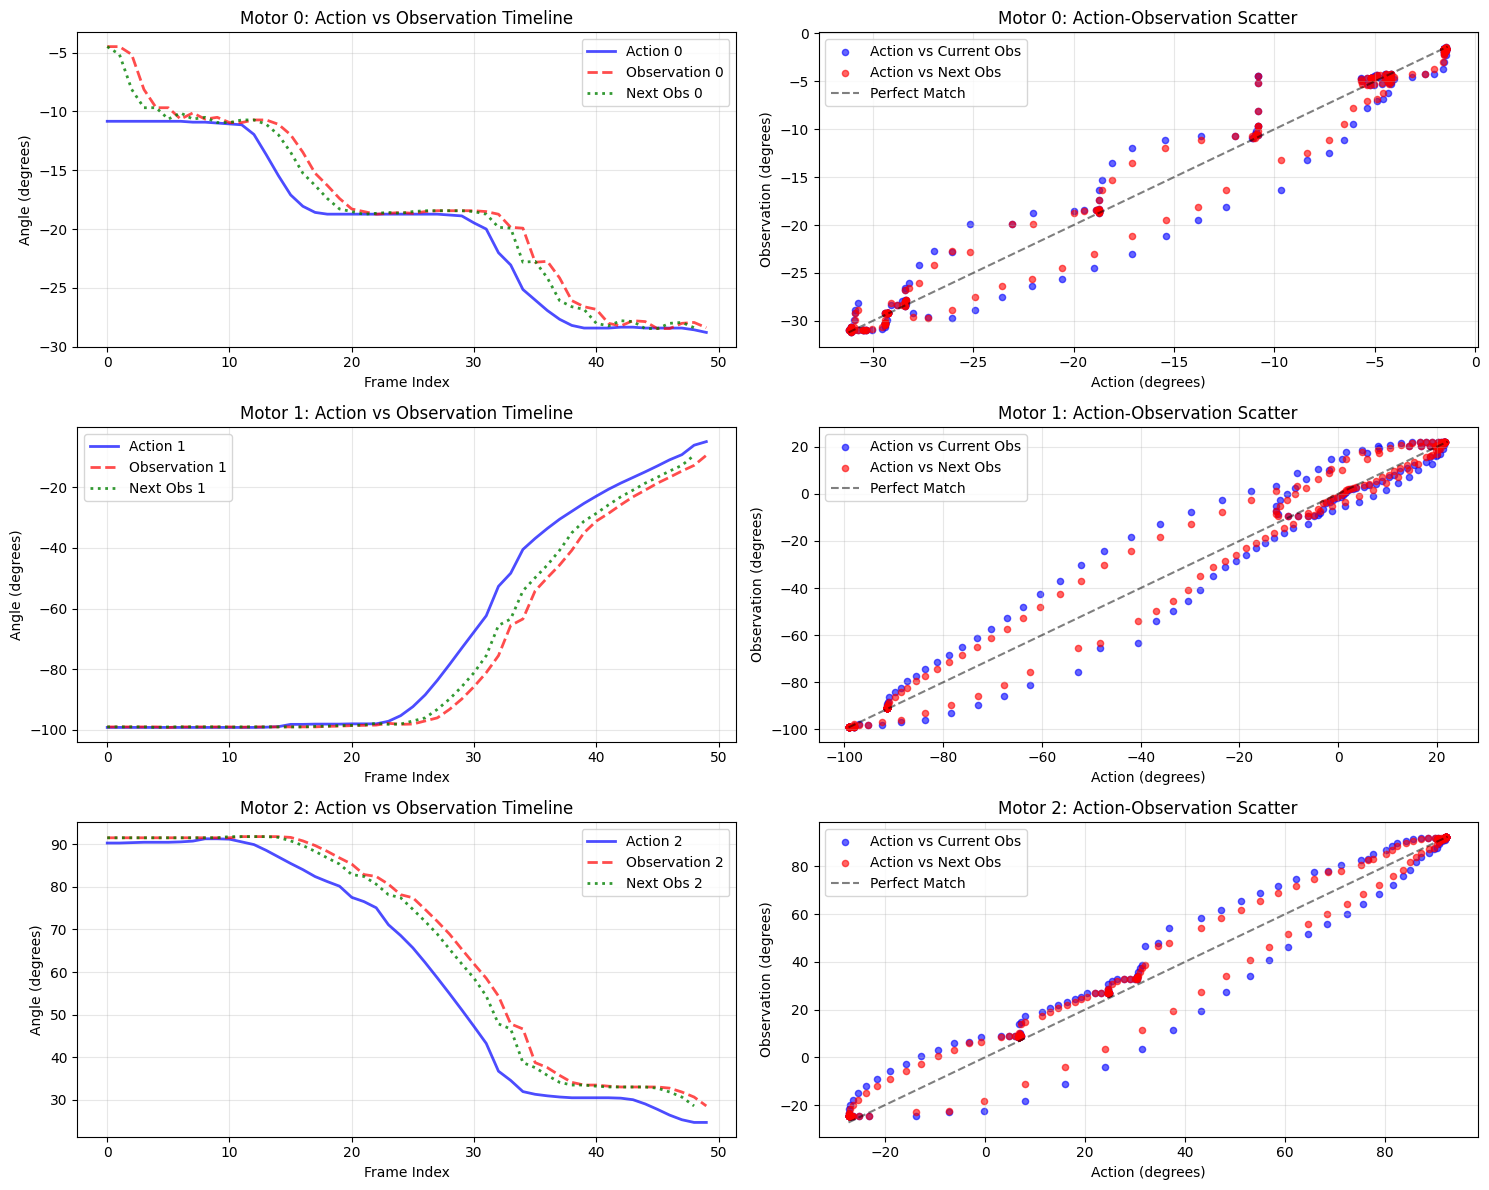


Difference Analysis Plots:


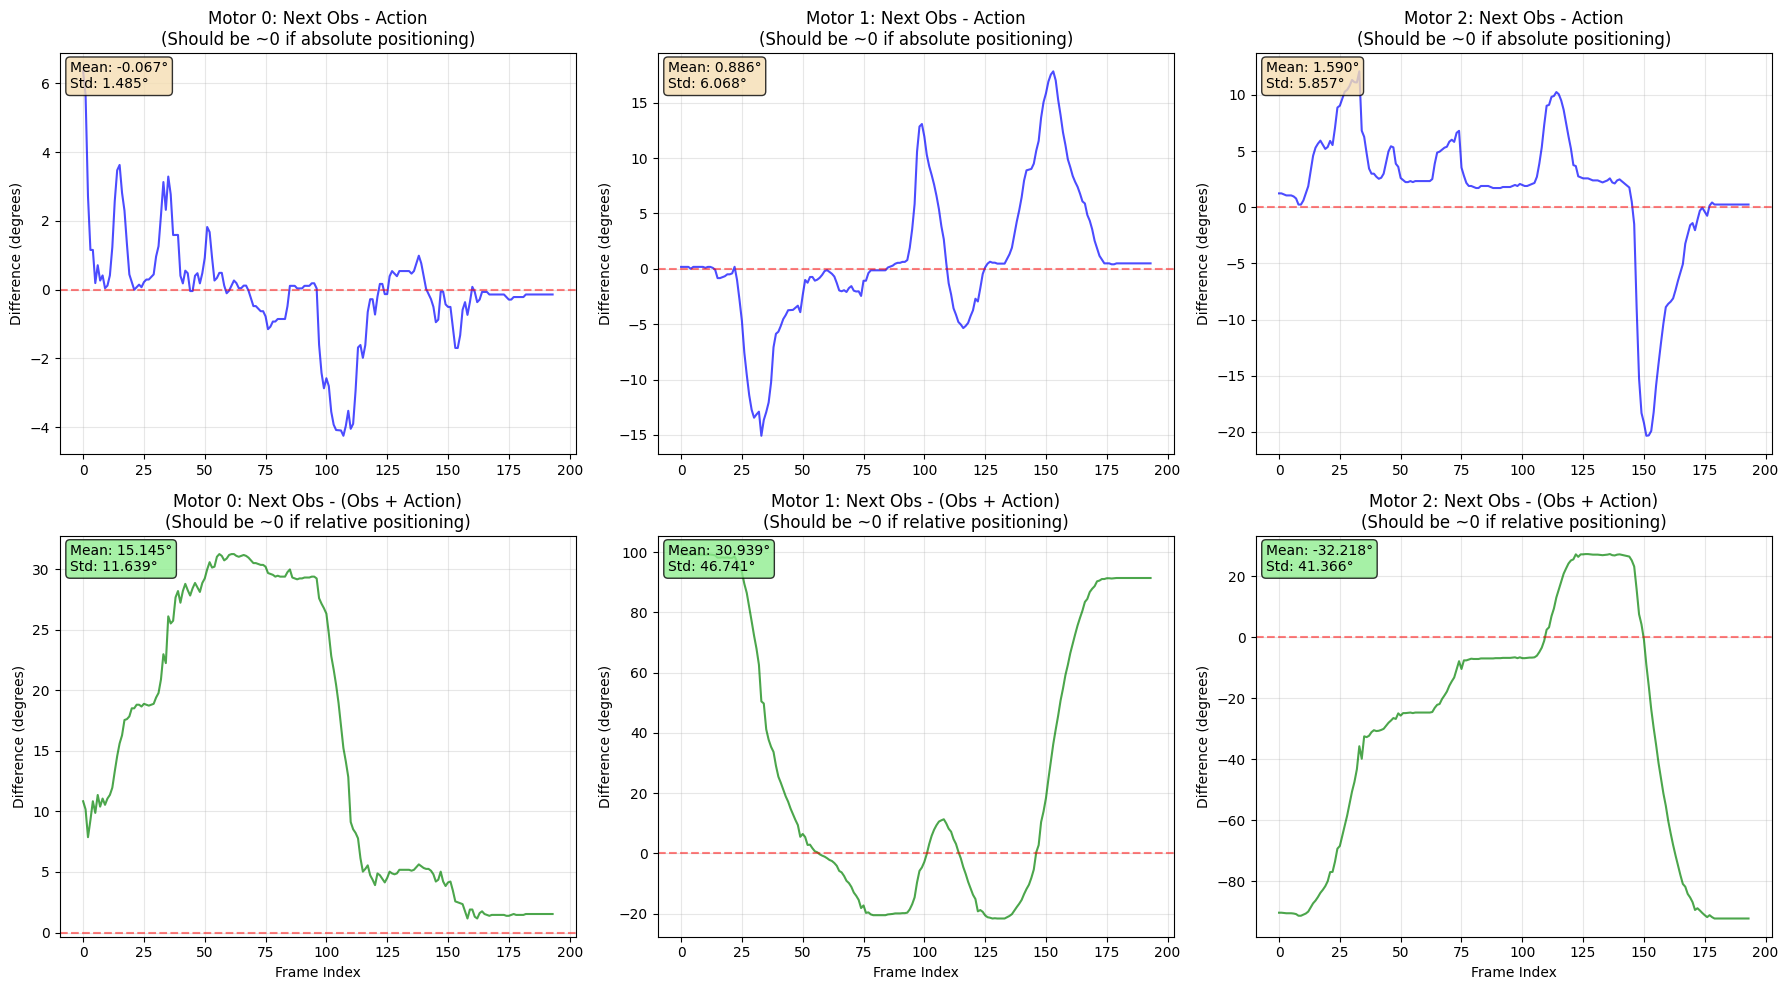


=== RELATIONSHIP SUMMARY TABLE ===
Motor | Abs Error | Rel Error | Action-NextObs Corr | Interpretation
------|-----------|-----------|---------------------|---------------
   0  |   0.900°  |  15.145°  |       0.992      | ABSOLUTE positioning
   1  |   3.981°  |  41.963°  |       0.992      | TRACKING (delayed absolute)
   2  |   4.336°  |  41.345°  |       0.990      | TRACKING (delayed absolute)
   3  |   1.666°  |  60.202°  |       0.956      | TRACKING (delayed absolute)
   4  |   0.422°  |   3.800°  |       0.986      | ABSOLUTE positioning
   5  |   1.991°  |   6.714°  |       0.935      | TRACKING (delayed absolute)

Interpretation Guide:
• ABSOLUTE: Actions are target positions, next_obs ≈ action
• RELATIVE: Actions are position changes, next_obs ≈ obs + action
• TRACKING: Actions are targets but with delay/smoothing
• COMPLEX: Mixed or non-standard control scheme

Value Format Summary:
• CALIBRATION uses 0-4095 for maximum precision in motor control
• TRAINING uses degrees 

In [28]:
# Visualizations for Action-Observation Relationships
print("=== ACTION-OBSERVATION RELATIONSHIP VISUALIZATIONS ===")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# For the first 3 motors, create detailed visualizations
for i in range(min(3, action_matrix.shape[1])):
    row = i
    
    # Left plot: Action vs Observation over time
    ax1 = axes[row, 0]
    time_indices = range(min(50, len(df)))  # Show first 50 frames for clarity
    
    ax1.plot(time_indices, action_matrix[time_indices, i], 'b-', label=f'Action {i}', alpha=0.7, linewidth=2)
    ax1.plot(time_indices, obs_matrix[time_indices, i], 'r--', label=f'Observation {i}', alpha=0.7, linewidth=2)
    
    # If next observation matches action (absolute positioning), they should align
    if len(time_indices) > 1:
        ax1.plot(time_indices[:-1], obs_matrix[1:len(time_indices), i], 'g:', 
                label=f'Next Obs {i}', alpha=0.8, linewidth=2)
    
    ax1.set_xlabel('Frame Index')
    ax1.set_ylabel('Angle (degrees)')
    ax1.set_title(f'Motor {i}: Action vs Observation Timeline')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Right plot: Scatter plot of relationships
    ax2 = axes[row, 1]
    
    # Plot action vs current observation
    ax2.scatter(action_matrix[:, i], obs_matrix[:, i], alpha=0.6, s=20, 
               label='Action vs Current Obs', color='blue')
    
    # Plot action vs next observation (if absolute positioning)
    if len(obs_matrix) > 1:
        ax2.scatter(action_matrix[:-1, i], obs_matrix[1:, i], alpha=0.6, s=20,
                   label='Action vs Next Obs', color='red')
    
    # Add diagonal line for reference (perfect correlation)
    min_val = min(action_matrix[:, i].min(), obs_matrix[:, i].min())
    max_val = max(action_matrix[:, i].max(), obs_matrix[:, i].max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Match')
    
    ax2.set_xlabel('Action (degrees)')
    ax2.set_ylabel('Observation (degrees)')
    ax2.set_title(f'Motor {i}: Action-Observation Scatter')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a difference analysis plot
print("\nDifference Analysis Plots:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(min(3, action_matrix.shape[1])):
    # Top row: Absolute difference (next_obs - action)
    ax1 = axes[0, i]
    if len(obs_matrix) > 1:
        abs_diff = obs_matrix[1:, i] - action_matrix[:-1, i]
        ax1.plot(abs_diff, 'b-', alpha=0.7)
        ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
        ax1.set_title(f'Motor {i}: Next Obs - Action\n(Should be ~0 if absolute positioning)')
        ax1.set_ylabel('Difference (degrees)')
        ax1.grid(True, alpha=0.3)
        
        # Add statistics
        mean_diff = np.mean(abs_diff)
        std_diff = np.std(abs_diff)
        ax1.text(0.02, 0.98, f'Mean: {mean_diff:.3f}°\nStd: {std_diff:.3f}°', 
                transform=ax1.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Bottom row: Relative difference (next_obs - (current_obs + action))
    ax2 = axes[1, i]
    if len(obs_matrix) > 1:
        rel_diff = obs_matrix[1:, i] - (obs_matrix[:-1, i] + action_matrix[:-1, i])
        ax2.plot(rel_diff, 'g-', alpha=0.7)
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
        ax2.set_title(f'Motor {i}: Next Obs - (Obs + Action)\n(Should be ~0 if relative positioning)')
        ax2.set_ylabel('Difference (degrees)')
        ax2.set_xlabel('Frame Index')
        ax2.grid(True, alpha=0.3)
        
        # Add statistics
        mean_rel_diff = np.mean(rel_diff)
        std_rel_diff = np.std(rel_diff)
        ax2.text(0.02, 0.98, f'Mean: {mean_rel_diff:.3f}°\nStd: {std_rel_diff:.3f}°', 
                transform=ax2.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

# Summary table of relationships
print("\n=== RELATIONSHIP SUMMARY TABLE ===")
print("Motor | Abs Error | Rel Error | Action-NextObs Corr | Interpretation")
print("------|-----------|-----------|---------------------|---------------")

for i in range(action_matrix.shape[1]):
    if len(obs_matrix) > 1:
        # Absolute positioning error
        abs_error = np.mean(np.abs(obs_matrix[1:, i] - action_matrix[:-1, i]))
        
        # Relative positioning error  
        rel_error = np.mean(np.abs(obs_matrix[1:, i] - (obs_matrix[:-1, i] + action_matrix[:-1, i])))
        
        # Correlation between action and next observation
        correlation = np.corrcoef(action_matrix[:-1, i], obs_matrix[1:, i])[0, 1]
        
        # Determine most likely interpretation
        if abs_error < rel_error and abs_error < 1.0:
            interpretation = "ABSOLUTE positioning"
        elif rel_error < abs_error and rel_error < 1.0:
            interpretation = "RELATIVE positioning"
        elif correlation > 0.8:
            interpretation = "TRACKING (delayed absolute)"
        else:
            interpretation = "COMPLEX (needs investigation)"
        
        print(f"  {i:2d}  |  {abs_error:6.3f}°  |  {rel_error:6.3f}°  |      {correlation:6.3f}      | {interpretation}")

print(f"\nInterpretation Guide:")
print(f"• ABSOLUTE: Actions are target positions, next_obs ≈ action")
print(f"• RELATIVE: Actions are position changes, next_obs ≈ obs + action") 
print(f"• TRACKING: Actions are targets but with delay/smoothing")
print(f"• COMPLEX: Mixed or non-standard control scheme")

print(f"\nValue Format Summary:")
print(f"• CALIBRATION uses 0-4095 for maximum precision in motor control")
print(f"• TRAINING uses degrees for neural network learning and human interpretation")
print(f"• The conversion preserves information: degrees = f(raw_counts, calibration_params)")
print(f"• Policy output (degrees) gets converted back to raw counts for motor commands")

In [29]:
# Temporal and episode analysis
print("=== TEMPORAL AND EPISODE ANALYSIS ===")

print(f"\nEpisode information:")
print(f"  Episode index: {df['episode_index'].iloc[0]} (this is episode {df['episode_index'].iloc[0]})")
print(f"  Total frames in this episode: {len(df)}")
print(f"  Frame index range: {df['frame_index'].min()} to {df['frame_index'].max()}")
print(f"  Timestamp range: {df['timestamp'].min():.6f} to {df['timestamp'].max():.6f} seconds")
print(f"  Episode duration: {df['timestamp'].max() - df['timestamp'].min():.3f} seconds")

# Calculate frame rate
if len(df) > 1:
    avg_time_diff = (df['timestamp'].max() - df['timestamp'].min()) / (len(df) - 1)
    estimated_fps = 1.0 / avg_time_diff if avg_time_diff > 0 else 0
    print(f"  Estimated FPS: {estimated_fps:.2f}")

# Check timestamp consistency
timestamp_diffs = df['timestamp'].diff().dropna()
print(f"\nTimestamp differences (frame intervals):")
print(f"  Min interval: {timestamp_diffs.min():.6f} seconds")
print(f"  Max interval: {timestamp_diffs.max():.6f} seconds")
print(f"  Mean interval: {timestamp_diffs.mean():.6f} seconds")
print(f"  Std interval: {timestamp_diffs.std():.6f} seconds")

# Check for frame consistency
frame_diffs = df['frame_index'].diff().dropna()
print(f"\nFrame index differences:")
print(f"  Expected: all differences should be 1")
print(f"  Actual differences: {frame_diffs.unique()}")
print(f"  Any missing frames: {not all(frame_diffs == 1)}")

# Index analysis
print(f"\nGlobal index information:")
print(f"  Index range: {df['index'].min()} to {df['index'].max()}")
print(f"  Index differences: {df['index'].diff().dropna().unique()}")
print(f"  Task index: {df['task_index'].unique()}")

=== TEMPORAL AND EPISODE ANALYSIS ===

Episode information:
  Episode index: 94 (this is episode 94)
  Total frames in this episode: 195
  Frame index range: 0 to 194
  Timestamp range: 0.000000 to 6.466667 seconds
  Episode duration: 6.467 seconds
  Estimated FPS: 30.00

Timestamp differences (frame intervals):
  Min interval: 0.033333 seconds
  Max interval: 0.033334 seconds
  Mean interval: 0.033333 seconds
  Std interval: 0.000000 seconds

Frame index differences:
  Expected: all differences should be 1
  Actual differences: [1.]
  Any missing frames: False

Global index information:
  Index range: 22706 to 22900
  Index differences: [1.]
  Task index: [0]


=== VISUALIZATIONS ===


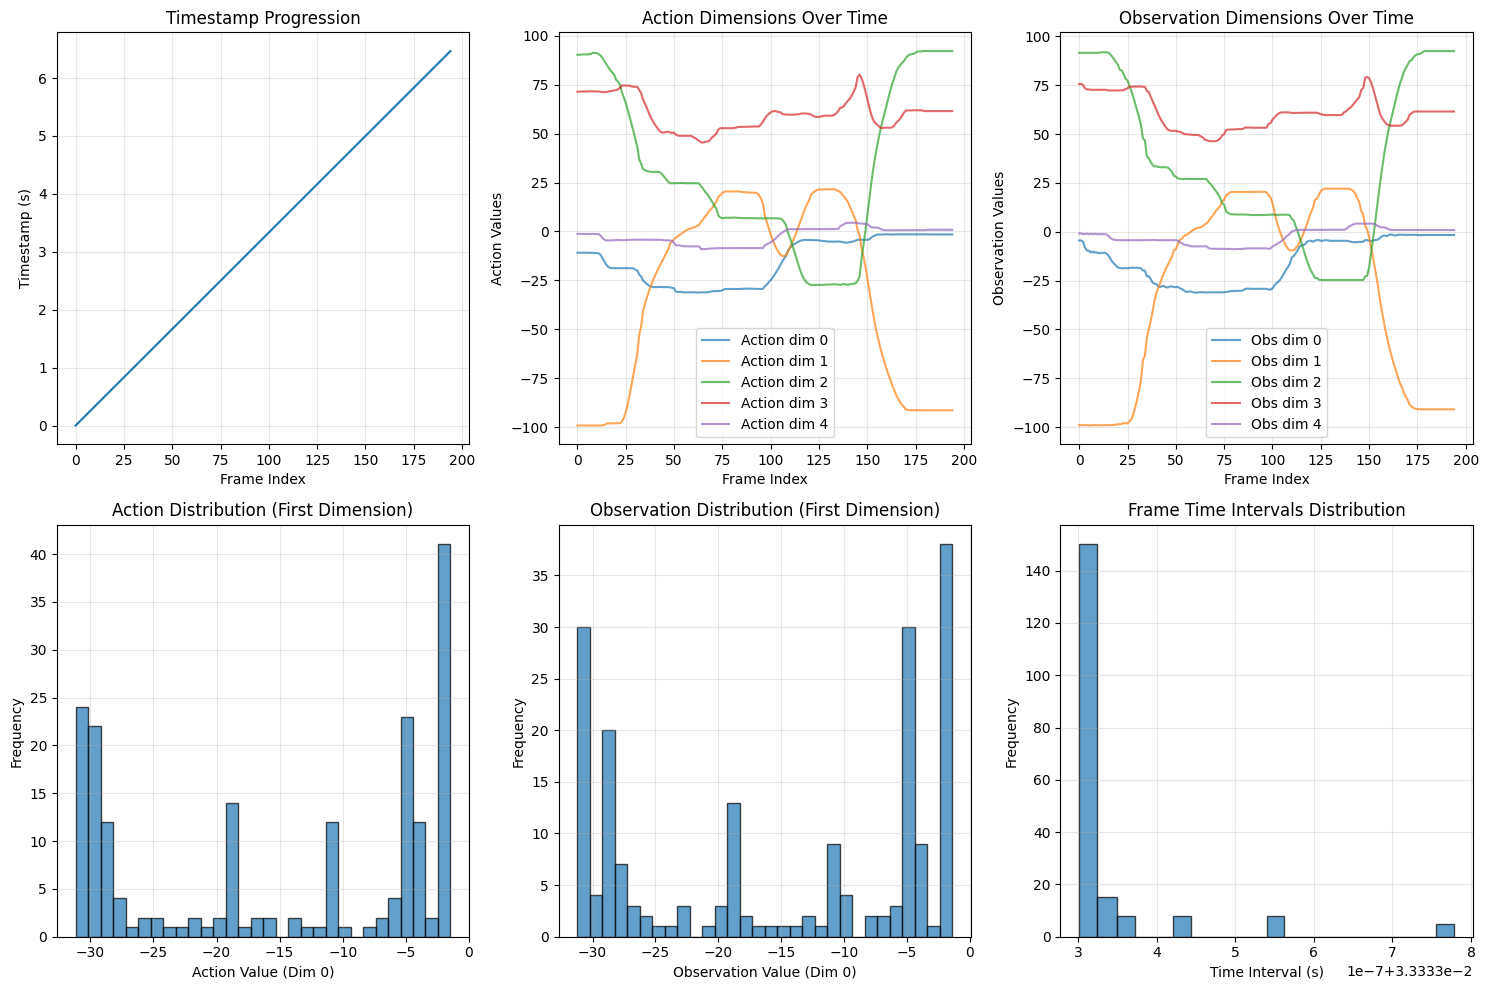

In [30]:
# Visualizations
print("=== VISUALIZATIONS ===")

# Set up the plotting style
plt.style.use('default')
fig_size = (15, 10)

# Plot 1: Timestamp progression
plt.figure(figsize=fig_size)

plt.subplot(2, 3, 1)
plt.plot(df['frame_index'], df['timestamp'])
plt.xlabel('Frame Index')
plt.ylabel('Timestamp (s)')
plt.title('Timestamp Progression')
plt.grid(True, alpha=0.3)

# Plot 2: First few action dimensions over time
plt.subplot(2, 3, 2)
for i in range(min(5, action_matrix.shape[1])):
    plt.plot(df['frame_index'], action_matrix[:, i], label=f'Action dim {i}', alpha=0.7)
plt.xlabel('Frame Index')
plt.ylabel('Action Values')
plt.title('Action Dimensions Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: First few observation dimensions over time
plt.subplot(2, 3, 3)
for i in range(min(5, obs_matrix.shape[1])):
    plt.plot(df['frame_index'], obs_matrix[:, i], label=f'Obs dim {i}', alpha=0.7)
plt.xlabel('Frame Index')
plt.ylabel('Observation Values')
plt.title('Observation Dimensions Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Action values distribution (first dimension)
plt.subplot(2, 3, 4)
plt.hist(action_matrix[:, 0], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Action Value (Dim 0)')
plt.ylabel('Frequency')
plt.title('Action Distribution (First Dimension)')
plt.grid(True, alpha=0.3)

# Plot 5: Observation values distribution (first dimension)
plt.subplot(2, 3, 5)
plt.hist(obs_matrix[:, 0], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Observation Value (Dim 0)')
plt.ylabel('Frequency')
plt.title('Observation Distribution (First Dimension)')
plt.grid(True, alpha=0.3)

# Plot 6: Timestamp intervals
plt.subplot(2, 3, 6)
plt.hist(timestamp_diffs, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Time Interval (s)')
plt.ylabel('Frequency')
plt.title('Frame Time Intervals Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===

Action-Observation correlations (first 5 dimensions):
  Dimension 0: 0.9853
  Dimension 1: 0.9847
  Dimension 2: 0.9817
  Dimension 3: 0.9206
  Dimension 4: 0.9742


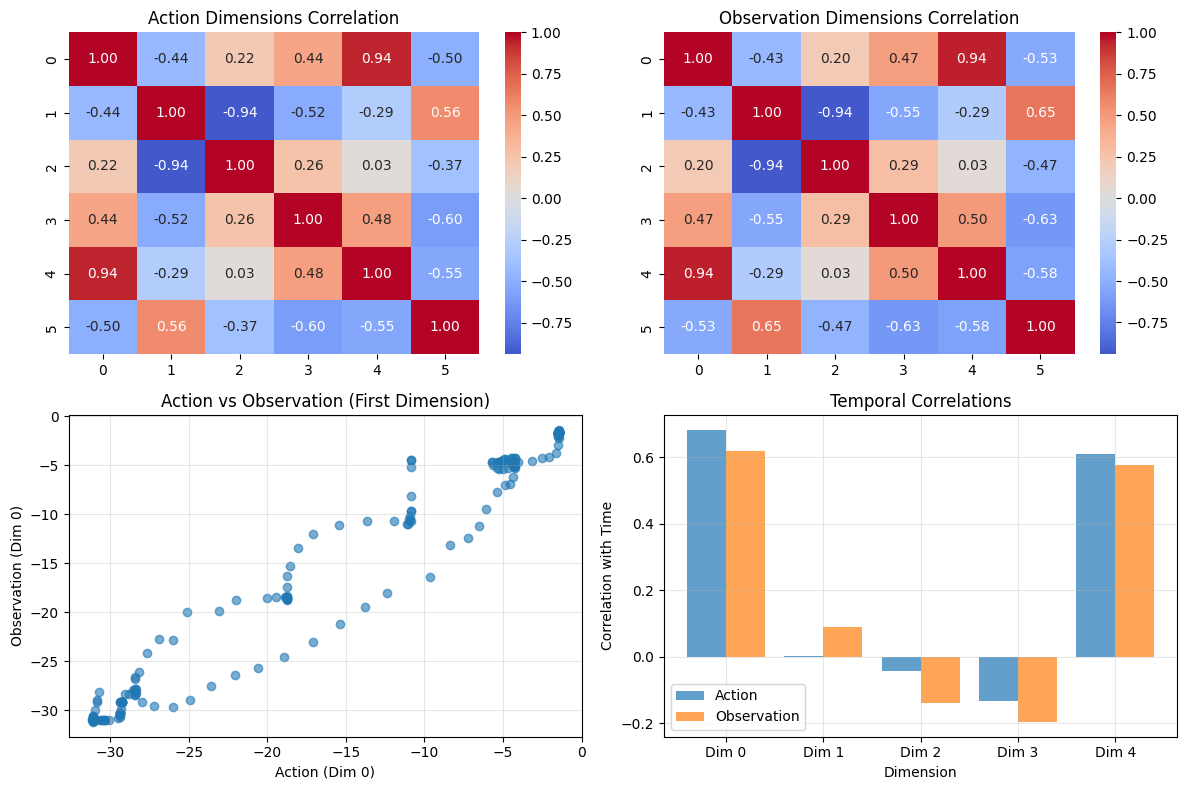

In [31]:
# Correlation and relationship analysis
print("=== CORRELATION ANALYSIS ===")

# Action-Observation correlation (for first few dimensions)
max_dims = min(5, action_matrix.shape[1], obs_matrix.shape[1])
print(f"\nAction-Observation correlations (first {max_dims} dimensions):")

correlations = []
for i in range(max_dims):
    corr = np.corrcoef(action_matrix[:, i], obs_matrix[:, i])[0, 1]
    correlations.append(corr)
    print(f"  Dimension {i}: {corr:.4f}")

# Plot correlation heatmap for actions and observations
plt.figure(figsize=(12, 8))

# Action correlation matrix
plt.subplot(2, 2, 1)
action_corr = np.corrcoef(action_matrix[:, :min(10, action_matrix.shape[1])].T)
sns.heatmap(action_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Action Dimensions Correlation')

# Observation correlation matrix
plt.subplot(2, 2, 2)
obs_corr = np.corrcoef(obs_matrix[:, :min(10, obs_matrix.shape[1])].T)
sns.heatmap(obs_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Observation Dimensions Correlation')

# Action vs Observation scatter plot (first dimension)
plt.subplot(2, 2, 3)
plt.scatter(action_matrix[:, 0], obs_matrix[:, 0], alpha=0.6)
plt.xlabel('Action (Dim 0)')
plt.ylabel('Observation (Dim 0)')
plt.title('Action vs Observation (First Dimension)')
plt.grid(True, alpha=0.3)

# Temporal correlation (action/observation vs time)
plt.subplot(2, 2, 4)
time_action_corr = [np.corrcoef(df['timestamp'], action_matrix[:, i])[0, 1] for i in range(min(5, action_matrix.shape[1]))]
time_obs_corr = [np.corrcoef(df['timestamp'], obs_matrix[:, i])[0, 1] for i in range(min(5, obs_matrix.shape[1]))]

x_pos = np.arange(len(time_action_corr))
plt.bar(x_pos - 0.2, time_action_corr, 0.4, label='Action', alpha=0.7)
plt.bar(x_pos + 0.2, time_obs_corr, 0.4, label='Observation', alpha=0.7)
plt.xlabel('Dimension')
plt.ylabel('Correlation with Time')
plt.title('Temporal Correlations')
plt.legend()
plt.xticks(x_pos, [f'Dim {i}' for i in range(len(time_action_corr))])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
# Data quality checks and summary
print("=== DATA QUALITY ANALYSIS ===")

# Check for anomalies and outliers
print("\nData Quality Checks:")

# 1. Missing values
print("1. Missing Values:")
print(f"   Any missing values: {df.isnull().any().any()}")
if df.isnull().any().any():
    print(f"   Missing value counts:")
    print(df.isnull().sum())

# 2. Duplicate rows
print(f"\n2. Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"   Number of duplicate rows: {duplicates}")

# 3. Action/Observation outliers (using IQR method)
print(f"\n3. Outlier Detection (IQR method):")

def detect_outliers_iqr(data, multiplier=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return np.sum((data < lower_bound) | (data > upper_bound))

action_outliers = detect_outliers_iqr(action_matrix.flatten())
obs_outliers = detect_outliers_iqr(obs_matrix.flatten())

print(f"   Action outliers: {action_outliers} out of {action_matrix.size} values ({100*action_outliers/action_matrix.size:.2f}%)")
print(f"   Observation outliers: {obs_outliers} out of {obs_matrix.size} values ({100*obs_outliers/obs_matrix.size:.2f}%)")

# 4. Check for constant dimensions
print(f"\n4. Constant Dimensions Check:")
action_constant_dims = []
obs_constant_dims = []

for i in range(action_matrix.shape[1]):
    if np.std(action_matrix[:, i]) < 1e-6:
        action_constant_dims.append(i)

for i in range(obs_matrix.shape[1]):
    if np.std(obs_matrix[:, i]) < 1e-6:
        obs_constant_dims.append(i)

print(f"   Action constant dimensions: {action_constant_dims if action_constant_dims else 'None'}")
print(f"   Observation constant dimensions: {obs_constant_dims if obs_constant_dims else 'None'}")

# 5. Value range checks
print(f"\n5. Value Range Analysis:")
print(f"   Action value range: [{action_matrix.min():.3f}, {action_matrix.max():.3f}]")
print(f"   Observation value range: [{obs_matrix.min():.3f}, {obs_matrix.max():.3f}]")

# Summary report
print("\n" + "="*50)
print("SUMMARY REPORT")
print("="*50)

print(f"""
Dataset Overview:
- Episode: {df['episode_index'].iloc[0]}
- Total frames: {len(df)}
- Duration: {df['timestamp'].max() - df['timestamp'].min():.3f} seconds
- Estimated FPS: {1.0 / timestamp_diffs.mean():.2f}

Data Structure:
- Action dimensions: {action_matrix.shape[1]}
- Observation dimensions: {obs_matrix.shape[1]}
- All timestamps consistent: {all(frame_diffs == 1)}
- Task index: {df['task_index'].iloc[0]}

Data Quality:
- Missing values: {df.isnull().any().any()}
- Duplicate rows: {duplicates}
- Action outliers: {100*action_outliers/action_matrix.size:.2f}%
- Observation outliers: {100*obs_outliers/obs_matrix.size:.2f}%
- Constant action dims: {len(action_constant_dims)}
- Constant obs dims: {len(obs_constant_dims)}

Value Ranges:
- Actions: [{action_matrix.min():.3f}, {action_matrix.max():.3f}]
- Observations: [{obs_matrix.min():.3f}, {obs_matrix.max():.3f}]
""")

=== DATA QUALITY ANALYSIS ===

Data Quality Checks:
1. Missing Values:
   Any missing values: False

2. Duplicate Rows:


TypeError: unhashable type: 'numpy.ndarray'